In [39]:
# importing libraries
import cv2
import numpy as np
import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import math

In [47]:
seg_masks = set([int(s.replace('.png', '')) for s in os.listdir('./test_3/segmentation_masks')[1:]])
ball_loc = pd.read_json('./test_3/ball_markup.json')
events = pd.read_json('./test_3/events_markup.json', typ='series')

font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (255, 0, 0)
thickness = 2

# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('./test_3.mp4')
fps = 120
# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")
  
# Read until video is completed
frame_i = 0
while(cap.isOpened()):
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        frame_i += 1
        if frame_i in seg_masks:
            #mask = cv2.imread(f'./test_3/segmentation_masks/{frame_i}.png')
            #mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]), interpolation = cv2.INTER_AREA)
            #frame = cv2.addWeighted(mask,0.4,frame,0.1,0)
            pass
        if frame_i in ball_loc:
            #cv2.imwrite(f'./test_3/frames/{frame_i}.jpg', frame)
            center_coordinates = tuple(ball_loc[frame_i])
            frame = cv2.circle(frame, center_coordinates, radius=10, color=(0, 255, 0), thickness=5)
        if frame_i in events:
            frame = cv2.putText(frame, events[frame_i], org, font, fontScale, color, thickness, cv2.LINE_AA)
        cv2.imshow('Frame', frame)
        
    # Press Q on keyboard to exit
        if cv2.waitKey(int(1)) & 0xFF == ord('q'):
            break

# Break the loop
    else:
        break
  
# When everything done, release
# the video capture object
cap.release()
  
# Closes all the frames
cv2.destroyAllWindows()

In [29]:
ball_loc.columns[0]

997

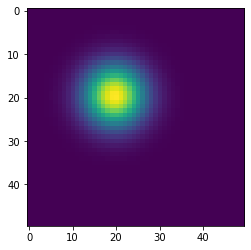

In [40]:
from scipy.stats import multivariate_normal

h = 50
w = 50

origins = [(20,20)]

def gaussian_2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1 / (2*math.pi*sx*sy) * \
      np.exp(-((x - mx)**2 / (2*sx**2) + (y - my)**2 / (2*sy**2)))

x = np.linspace(0, h, h)
y = np.linspace(0, w, w)
x, y = np.meshgrid(x, y)

z = np.zeros((h, w))
for x0, y0 in origins:
    z += gaussian_2d(x, y, mx=x0, my=y0, sx=h/10, sy=w/10)


plt.imshow(z)